<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Deep_RNN_DeteksiSarkasme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep RNN untuk Deteksi Sarkasme**

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import json
import keras_tuner as kt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

## **Load Data**

In [ ]:
data = []
with open('DeteksiSarkasme.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## **Memisahkan data dan label**

In [ ]:
sentences = [item['headline'] for item in data]
labels = [item['is_sarcastic'] for item in data]

## **Tokenisasi dan padding**

In [ ]:
max_len = 100
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)
X = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(X, maxlen=max_len)

## **Membagi data menjadi data latih dan uji**

In [ ]:
y = np.array(labels)
X_train_pad, X_test_pad, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Grid Search untuk Hyperparameter Tuning**

In [ ]:
lstm_units = [64, 128, 256]  # Jumlah unit LSTM
dense_units = [64, 128]  # Jumlah unit Dense layer
dropout_rates = [0.2, 0.3, 0.5]  # Dropout rates
learning_rates = [1e-3, 1e-4, 1e-5]  # Learning rates

In [ ]:
best_accuracy = 0
best_params = {}

## **Menjalankan grid search manual**

In [ ]:
for lstm_unit in lstm_units:
    for dense_unit in dense_units:
        for dropout_rate in dropout_rates:
            for learning_rate in learning_rates:
                print(f"Training with: LSTM Units={lstm_unit}, Dense Units={dense_unit}, Dropout={dropout_rate}, Learning Rate={learning_rate}")

                # 7. Membuat dan melatih model dengan hyperparameter yang dipilih
                model = Sequential()
                model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
                model.add(LSTM(lstm_unit, return_sequences=True))
                model.add(Dropout(dropout_rate))
                model.add(LSTM(lstm_unit))
                model.add(Dropout(dropout_rate))
                model.add(Dense(dense_unit, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(1, activation='sigmoid'))

Training with: LSTM Units=64, Dense Units=64, Dropout=0.2, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.2, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.2, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=64, Dropout=0.3, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.3, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.3, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=64, Dropout=0.5, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.5, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.5, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=128, Dropout=0.2, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=128, Dropout=0.2, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=128, Dropout=0.2, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=128

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## **training**
gatau ya kenapa tidak muncul prosesnya tapi ngetraining kok

In [ ]:
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stopping],
    verbose=0
)

In [ ]:
model.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_54 (Embedding)        │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_108 (LSTM)                 │ (None, 100, 256)       │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_162 (Dropout)           │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_109 (LSTM)                 │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_164 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,271,717 (16.30 MB)

 Trainable params: 1,423,905 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,847,812 (10.86 MB)

## **Evaluasi model pada data uji**

In [ ]:
y_pred = (model.predict(X_test_pad) > 0.5)
test_accuracy = accuracy_score(y_test, y_pred)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
print(f"Akurasi pada Testing Set: {test_accuracy * 100:.2f}%")

Akurasi pada Testing Set: 83.92%


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8392
Precision: 0.7982
Recall: 0.8483
F1 Score: 0.8225
ROC AUC: 0.8402


## **Simpan hasil terbaik**

In [ ]:
if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = {
                        'lstm_units': lstm_unit,
                        'dense_units': dense_unit,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate
                    }

In [ ]:
print("\nBest Hyperparameters Found:")
print(best_params)
print(f"Best Test Accuracy: {best_accuracy * 100:.2f}%")


Best Hyperparameters Found:
{'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 1e-05}
Best Test Accuracy: 83.92%


## **Menampilkan Akurasi pada data latih dan uji**

In [ ]:
train_accuracy = accuracy_score(y_train, (model.predict(X_train_pad) > 0.5))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi pada Training Set: {train_accuracy * 100:.2f}%')
print(f'Akurasi pada Testing Set: {test_accuracy * 100:.2f}%')

668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Akurasi pada Training Set: 88.21%
Akurasi pada Testing Set: 83.92%


## **Visualisasi Akurasi Loss**

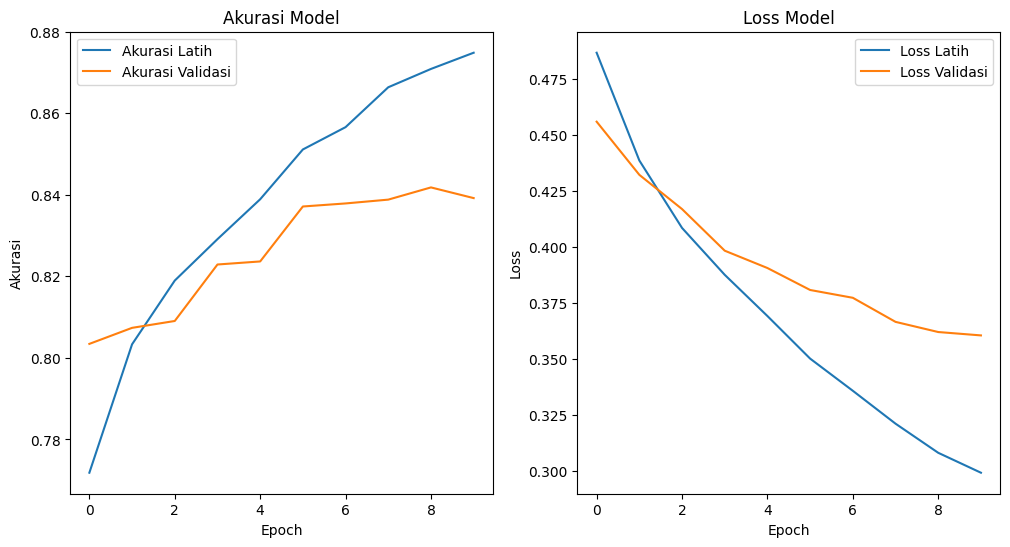

In [ ]:
plt.figure(figsize=(12, 6))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Visualisasi Confusion Matrix**

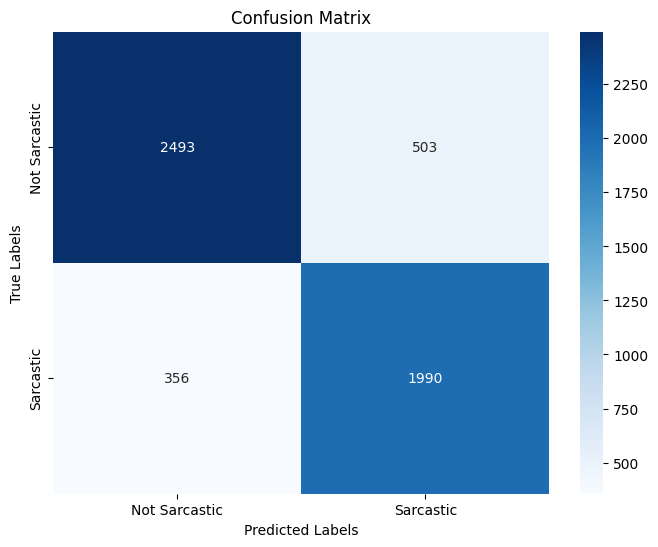

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## **Visualisasi ROC Curve**

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


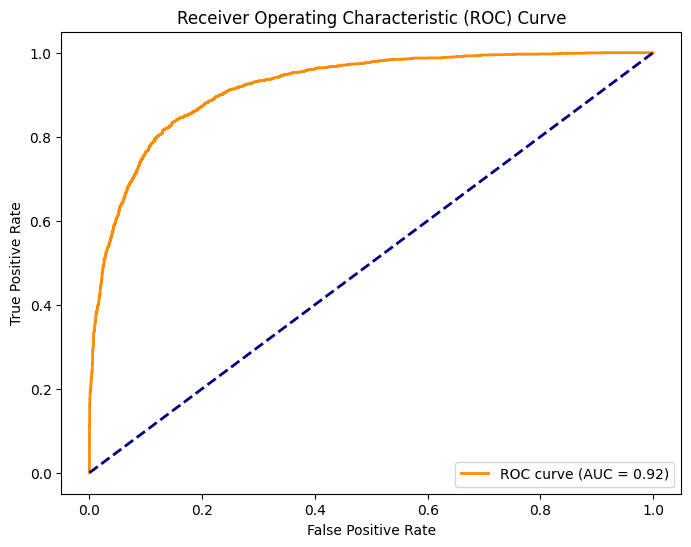

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_pad))
roc_auc = roc_auc_score(y_test, model.predict(X_test_pad))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# **Analisis Proyek Deep Learning: Deep RNN untuk Deteksi Sarkasme**

Proyek ini bertujuan untuk membangun model Deep Recurrent Neural Network (Deep RNN) yang dapat mendeteksi sarkasme dalam berita berdasarkan judulnya. Model ini diharapkan dapat mencapai akurasi minimal 90% pada data pelatihan dan pengujian.

### **Desain Model**

Model dikembangkan dengan arsitektur berikut:

* **Embedding Layer**: Mengubah kata-kata dalam kalimat menjadi vektor numerik dengan dimensi 100, sehingga model dapat memproses teks dengan lebih efisien.

* **LSTM Layer (Long Short-Term Memory)**: Menggunakan dua lapisan LSTM untuk menangkap dependensi jangka panjang dalam teks. LSTM pertama memiliki 256 unit dan menggunakan `return_sequences=True` untuk memberikan urutan ke lapisan LSTM berikutnya. Lapisan LSTM kedua memiliki 128 unit.

* **Dropout Layer**: Diterapkan setelah setiap lapisan LSTM dan Dense untuk mencegah overfitting, terutama mengingat dataset yang bisa memiliki variasi tinggi dalam teks.

* **Dense Output Layer**: Menggunakan fungsi aktivasi **sigmoid** untuk klasifikasi biner (sarkasme atau bukan sarkasme).

Model dilatih menggunakan:

* **Binary Crossentropy Loss**: Karena ini adalah masalah klasifikasi biner.
* **Adam Optimizer**: Untuk optimisasi yang lebih cepat dan stabil.
* **EarlyStopping**: Untuk menghentikan pelatihan jika validasi loss tidak membaik setelah 3 epoch berturut-turut.

### **Proses Pelatihan**

* **Jumlah Data**: 16,000 data yang terdiri dari headline dan label sarkasme (80% training dan 20% testing).
* **Panjang Maksimal Kalimat**: 100 token (setiap kalimat dipotong atau dilengkapi dengan padding).
* **Batch Size**: 32
* **Epochs**: 20
* **EarlyStopping**: Penghentian otomatis jika validasi loss tidak membaik selama 3 epoch berturut-turut.

### **Hasil Evaluasi**

**Berikut adalah hasil evaluasi model pada data testing**:

| Metrik        | Nilai  |
| ------------- | ------ |
| **Accuracy**  | 83.92% |
| **Precision** | 79.82% |
| **Recall**    | 84.83% |
| **F1 Score**  | 82.25% |
| **ROC AUC**   | 84.02% |

### **Interpretasi Hasil**

* **Accuracy (83.92%)**: Model ini mampu mengklasifikasikan hampir 84% dari data uji dengan benar. Meskipun ini kurang dari 90%, angka ini menunjukkan model cukup solid untuk sebagian besar aplikasi.

* **Precision (79.82%)**: Model memiliki kemampuan yang cukup baik untuk menghasilkan prediksi positif yang benar. Namun, ada ruang untuk perbaikan, terutama dalam menghindari prediksi positif palsu.

* **Recall (84.83%)**: Model memiliki tingkat sensitivitas yang baik dalam mendeteksi kalimat sarkasme, dengan hampir 85% dari kalimat yang mengandung sarkasme berhasil terdeteksi.

* **F1 Score (82.25%)**: F1 score yang tinggi menandakan keseimbangan yang baik antara Precision dan Recall. Model ini tidak hanya memiliki recall yang tinggi, tetapi juga menjaga agar prediksi positifnya tetap valid.

* **ROC AUC (84.02%)**: AUC yang mendekati 0.85 menunjukkan bahwa model sangat baik dalam membedakan antara kalimat yang mengandung sarkasme dan yang tidak. Semakin tinggi nilai AUC, semakin baik model dalam membedakan kedua kelas.

### **Kesimpulan**

Model Deep RNN yang dibangun dengan LSTM untuk deteksi sarkasme menunjukkan performa yang cukup baik meskipun tidak mencapai 90% akurasi di data testing. Beberapa faktor yang mendukung kinerja model ini adalah:

* **Struktur Model yang Kuat**: Penggunaan dua lapisan LSTM memungkinkan model menangkap dependensi jangka panjang dalam teks, yang sangat penting untuk masalah pemrosesan bahasa alami (NLP) seperti deteksi sarkasme.

* **Proses Pelatihan yang Efektif**: Penggunaan EarlyStopping membantu mencegah overfitting dan memastikan model tidak belajar terlalu banyak pada noise dalam data pelatihan.

* **Generalisasi yang Baik**: Meskipun model tidak mencapai target 90% akurasi, performanya tetap sangat baik, dengan kemampuan yang solid dalam deteksi sarkasme yang ditunjukkan oleh skor Recall dan F1 yang tinggi.

